In [1]:

import plot_functions
import compare_clusterings
import process_data
import visualizations

from compare_clusterings import *
from process_data import *
from plot_functions import *
from visualizations import *

In [2]:

import plot_functions
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import traj_generator
import physics_sim_simple_moreparticles_partners_central

import process_data
import numpy as np
import plotly.graph_objs as go
from copy import deepcopy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

In [4]:
import traj_generator

In [5]:
import numpy as np
import plotly.graph_objs as go

In [6]:
particles_from_sim = physics_sim_simple_moreparticles_partners_central.particles_init_simulate_smallgroups_sab_velocity_objects(dt=0.1, invert_velocity_after_steps_var=None, box_variable=False, partdim_variable=3, boxl_variable=50, adopt_vel_var=True, const_vel_try_variable=False, act_magnitude=30, move_groups_nr=4, furtherparticles=40)

Fixed-length list of lists: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]]
Randomly selected numbers: [7, 13, 29, 30]
change groups
change groups
change groups
change groups
change groups
change groups
change groups
change groups
change groups


In [7]:
for i in particles_from_sim:
    print(i.velocity)

[ 0.01102487 -0.77379384  1.64513229]
[1.07706315 0.5265905  0.8833712 ]
[ 0.64306091 -0.89575166  0.0671592 ]
[ 0.42599241  0.8114476  -2.82976928]
[ 0.85011072 -0.93591749  0.63508903]
[ 0.4458618   0.91137554 -0.83436321]
[-0.0174483  -0.34095873  0.47117217]
[-0.4654561   0.25774133  1.0016556 ]
[ 0.6930438  -0.32946903 -0.45272043]
[ 0.24221995  0.48067063 -0.85890608]
[ 0.57545585  0.95053828 -1.58479406]
[ 1.02854956  1.15309301 -1.34806233]
[ 1.29027961 -0.58256151  0.83634654]
[-0.70546611  0.10403931  0.23157845]
[-1.21781823 -0.10032968  0.52085576]
[-1.47814699  0.3424437   0.10625802]
[-0.49069031 -0.07925693 -1.17554681]
[0.28234731 2.07737419 0.39198256]
[ 0.66945347 -1.08077329 -0.2864701 ]
[ 0.00537666  0.56794811 -1.18260092]
[1.50230582 0.26503597 0.34717434]
[-1.5672483   0.58373632 -0.45630394]
[0.51204565 1.09670892 0.3555495 ]
[-0.78077385 -0.13432051  0.46039254]
[-0.27594453 -0.04388841 -0.93584771]
[-0.30965413 -1.46429381 -1.46375634]
[-0.09297995 -1.32220651

In [8]:
trajectories = process_data.simulation_to_array_group_changes(particles_from_sim,  group_attribute_name ="curr_group_list")

In [9]:
plot_functions.plot_traj_labels_plotly_2nd(trajectories)

In [10]:
trajectories

[[[-1.631772030409998, -0.07048836555281209, 0.46618026162492326, 0],
  [-1.8205937010941318, 2.8478399411848274, -0.20292830264090117, 0],
  [-3.9266254308640582, 4.4050730846630755, -1.6835231314591588, 0],
  [-5.495472977991613, 6.692472602323173, -0.5846440742203654, 0],
  [-6.699599713770378, 8.849098951029383, 0.9352985786380176, 0],
  [-8.71545249234992, 10.412686926493835, 2.4850091671545966, 0],
  [-10.832680601549095, 11.620826153261754, 4.3098089507432755, 0],
  [-12.97060188762601, 12.250871852953715, 6.380501806554305, 0],
  [-14.765374724587732, 13.184468941039363, 8.638350494528655, 0],
  [-16.219307970015592, 14.63924790278244, 10.928064987313238, 0],
  [-17.31553788474392, 16.65674301605558, 13.083580218218968, 0],
  [-18.723114699419636, 18.89814334125838, 14.940220408553149, 0],
  [-20.08026938933373, 21.443938920675087, 16.414486576724194, 0],
  [-21.485368556169423, 24.179588757638307, 17.294611506067024, 0],
  [-22.955859677503007, 26.605126662282828, 18.731030914

In [11]:
groups_list = np.array(trajectories)[:,:,-1]
num_groups = len(np.unique(np.array(groups_list).flatten()))

In [12]:
num_groups

4

In [13]:
%matplotlib notebook


a = plot_functions.plot_traj_labels_plt(trajectories, save_video=False, interval = 10)

<IPython.core.display.Javascript object>

In [14]:
a

In [15]:
plt.show()

In [16]:
from IPython.display import HTML
#HTML(a.to_html5_video())

In [17]:
df = process_data.create_clustering_df(trajectories)

# pair plot 1

In [18]:
import redpandda_general
traj_array, point_array, frames_count, n_objects = redpandda_general.prepare_data_from_df(df)

dist_matrices = redpandda_general.get_distance_matrices(traj_array)
delta_matrices = redpandda_general.get_delta_matrices(dist_matrices)
average_delta_matrix = redpandda_general.calculate_average_delta_matrix(delta_matrices)

std_delta_matrix = redpandda_general.get_std_matrices(dist_matrices)

stddv_matrices = redpandda_general.get_stddv(dist_matrices)

In [19]:
from timestep_clustering import compute_timstep_clustering, apply_rpt_change_detection

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
import clustering_functions
def full_workflow(delta_matrices, scale_embedding = False, change_point_detection=True, alternative_clustering_method="hdbscan", final_clustering_method="hdbscan"):
    embedding = compute_timstep_clustering(delta_matrices, title_type="Delta-matrices", dim_red="umap", metric="wasserstein", plot_dim_red=True, kde_plot=True, plot_heatmap=True)
    if isinstance(embedding, tuple):
        embedding = embedding[0]


    if scale_embedding:
        from sklearn.preprocessing import StandardScaler
        embedding = StandardScaler().fit_transform(embedding)

    if change_point_detection:
        change_points = apply_rpt_change_detection(embedding, pen=5)

        timestep_clusters = clustering_functions.cluster_timesteps_change_points(delta_matrices, change_points, "affinity")
        return timestep_clusters
    
    else:
        import hdbscan
        if alternative_clustering_method == "hdbscan":
            clusterer = hdbscan.HDBSCAN(min_cluster_size=5)  
            labels = clusterer.fit_predict(embedding[0])
        
        timestep_clusters_from_clustering = clustering_functions.cluster_timesteps_from_timestep_clustering(delta_matrices, labels, final_clustering_method)
        return timestep_clusters_from_clustering    

In [22]:
%matplotlib inline

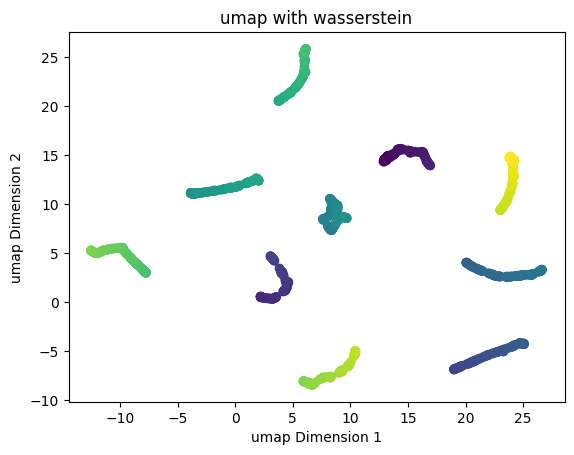

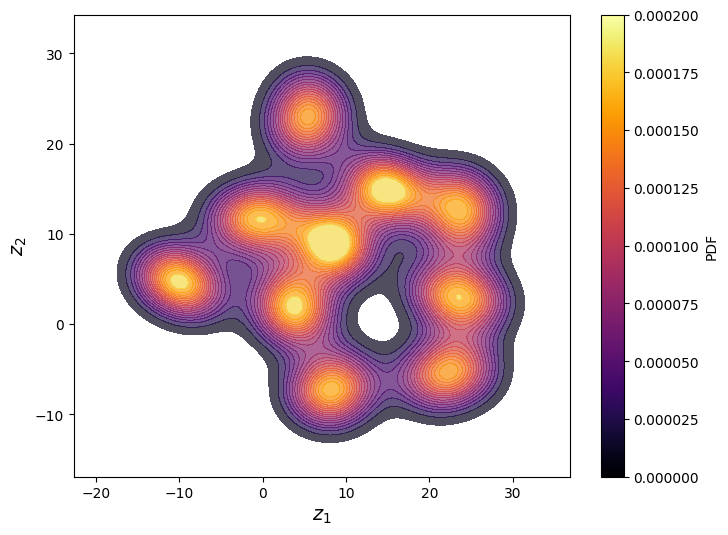

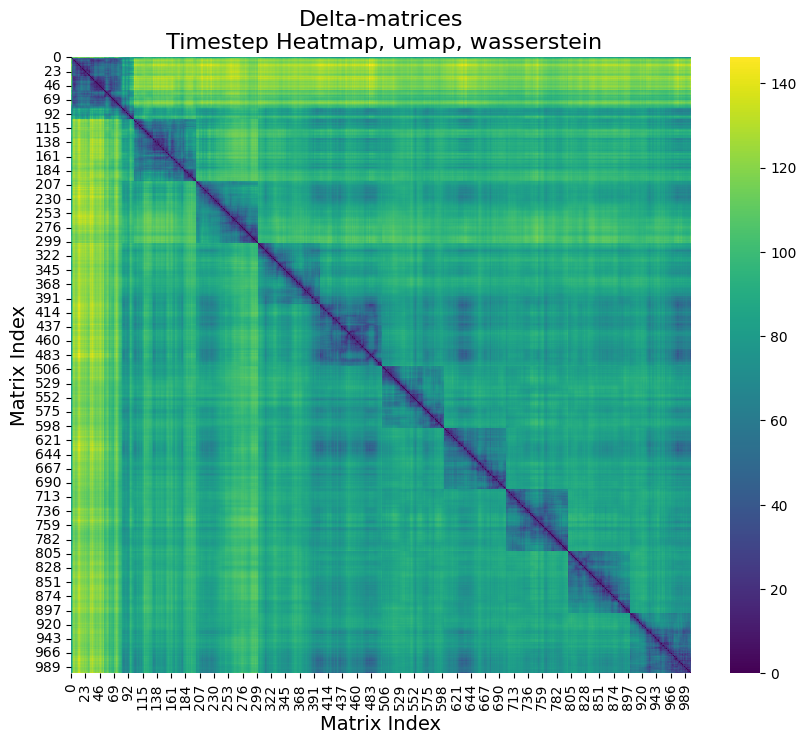

In [23]:
embedding = compute_timstep_clustering(delta_matrices, title_type="Delta-matrices", dim_red="umap", metric="wasserstein", plot_dim_red=True, kde_plot=True, plot_heatmap=True)

In [24]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)  
labels = clusterer.fit_predict(embedding[0])

In [25]:
labels

array([48, 40, 65, 66, 66, 66, 66, 66, 64, 64, 64, 64, 64, 64, 64, 65, 65,
       65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, -1, 66, 66, 66,
       66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67,
       67, 67, -1, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, -1, 52, 52, 52,
       52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, -1, 52, 63, 63, 63,
       63, 63, 63, 63, 63, 63, 63, 62, -1, 62, 62, 62, 62, 62, 62, 62, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, -1, -1, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, -1, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, -1, 45, 45,
       45, -1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, -1,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, -1, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       -1, 24, 24, 24, 24

In [26]:
change_points = apply_rpt_change_detection(embedding[0], pen=5)

In [27]:
import clustering_functions

In [28]:
timestep_clusters = clustering_functions.cluster_timesteps_change_points(delta_matrices, change_points, "affinity")

0.0062
0.0044
0.0060
0.0040
0.0043
0.0041
0.0042
0.0050
0.0049
0.0048


In [29]:
timestep_clusters

[{'start': 0,
  'end': 101,
  'clustering': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)},
 {'start': 102,
  'end': 201,
  'clustering': array([2, 0, 3, 3, 3, 2, 2, 1, 1, 3, 3, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 3,
         3, 0, 1, 2, 2, 2, 1, 3, 0, 0, 1, 1, 1, 1, 3, 1, 2, 3], dtype=int64)},
 {'start': 202,
  'end': 301,
  'clustering': array([3, 3, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 1, 3, 3, 1, 1, 1,
         0, 2, 3, 1, 1, 3, 0, 3, 0, 2, 1, 0, 0, 1, 0, 3, 1, 1], dtype=int64)},
 {'start': 302,
  'end': 401,
  'clustering': array([3, 3, 3, 1, 0, 0, 2, 0, 1, 2, 0, 2, 3, 1, 2, 2, 0, 3, 3, 0, 1, 1,
         3, 1, 0, 1, 2, 1, 2, 0, 1, 2, 1, 3, 3, 0, 2, 0, 3, 2], dtype=int64)},
 {'start': 402,
  'end': 501,
  'clustering': array([2, 3, 0, 0, 1, 3, 1, 0, 2, 3, 2, 3, 1, 1, 3, 1, 0, 3, 2, 2, 1, 2,
         0, 1, 0, 0, 2, 2, 3, 0, 0, 2, 1, 2, 3, 3, 3, 0, 1, 1], dtype=int64)},
 {'start': 5

In [30]:
timestep_clusters_from_clustering = clustering_functions.cluster_timesteps_from_timestep_clustering(delta_matrices, labels, "affinity")

0.0347
0.0055
0.0039
0.0033
0.0031
0.0044
0.0045
0.0051
0.0046
0.0041
0.0048
0.0033
0.0037
0.0030
0.0048
0.0022
0.0026
0.0022
0.0023
0.0015
0.0024
0.0026
0.0037
0.0050
0.0051
0.0034
0.0040
0.0034
0.0044
0.0042
0.0044
0.0031
0.0031
0.0047
0.0040
0.0042
0.0034
0.0042
0.0046
0.0035
0.0026
0.0020
0.0025
0.0035
0.0045
0.0036
0.0030
0.0052
0.0036
0.0046
0.0040
0.0050
0.0045
0.0072
0.0037
0.0085
0.0039
0.0041
0.0036
0.0044
0.0040
0.0052
0.0044
0.0045
0.0048
0.0050
0.0034
0.0033
0.0034
0.0022
0.0020
0.0015
0.0021
0.0026
0.0021
0.0042
0.0044


In [31]:
timestep_clusters_from_clustering

[{'indices': array([ 30,  53,  64,  80,  93, 116, 117, 132, 150, 154, 165, 211, 221,
         240, 250, 271, 354, 355, 359, 372, 401, 402, 420, 434, 443, 444,
         473, 474, 475, 520, 521, 522, 523, 530, 580, 581, 582, 586, 596,
         599, 600, 644, 645, 646, 654, 669, 726, 729, 742, 743, 761, 780,
         811, 824, 831, 832, 833, 926, 963, 964, 965], dtype=int64),
  'clustering': array([4, 4, 2, 0, 6, 2, 0, 0, 1, 2, 3, 2, 4, 5, 3, 3, 5, 3, 4, 5, 6, 5,
         5, 3, 5, 5, 7, 4, 3, 0, 2, 4, 1, 1, 1, 6, 3, 6, 7, 2], dtype=int64)},
 {'indices': array([882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894,
         895, 896, 897, 898, 899, 900], dtype=int64),
  'clustering': array([0, 2, 0, 0, 1, 3, 1, 0, 2, 3, 3, 1, 1, 3, 2, 2, 3, 1, 3, 0, 1, 0,
         0, 2, 3, 2, 2, 0, 2, 1, 3, 0, 3, 1, 3, 1, 1, 0, 2, 2], dtype=int64)},
 {'indices': array([856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868,
         869, 870], dtype=int64),
  'clustering': array([2, 3, 2